In [1]:
import pandas as pd
import json 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import ttest_ind

In [2]:
top52 = pd.read_csv('papers_with_ds_2_20.csv',index_col=0)

In [6]:
ds10_ds = top52[(top52['year']<=2010) & (top52['year']>=2000)]

In [ ]:
ds10_ds['year'] = ds10_ds['year'].map(int)

In [7]:
len(top52), len(ds10_ds)

(160363, 78656)

In [4]:
oc = pd.read_csv('preprocessed_data/oc_yrcleaned.csv')

In [64]:
octop5 = oc[oc['cited'].isin(ds10_ds['doi'].values)]

In [66]:
octop5['citing_pub_year'].unique()

array([2016., 2011., 2019., 2012., 2010., 2017., 2013., 2009., 1998.,
       2020., 2014., 2004., 2005., 2006., 2007., 2015., 2008., 1999.,
       2018., 2003., 2021., 1963., 1991., 1990., 1992., 1993., 1989.,
       1995., 1988., 2002., 1994., 1996., 1997., 2000., 2001.,    0.,
       1982., 1985., 1977., 1971., 1972., 1980., 1984., 1986., 1981.,
       1987., 1983., 9737., 1970., 1973., 1979., 1978., 1976., 1974.,
       1942., 1959., 1962.,   13., 1954., 1964., 1965., 1966., 1967.,
       1968., 1969., 1975., 1925.])

In [67]:
top5cites_yr = octop5.groupby(['cited','citing_pub_year']).agg({'citing':'count'}).reset_index()

In [99]:
top5cites_yr.head()

,cited,citing_pub_year,citing,year
0,10.1002/(sici)1096-987x(20000130)21:2<105::aid...,2000.0,1,2000
1,10.1002/(sici)1096-987x(20000130)21:2<105::aid...,2001.0,1,2000
2,10.1002/(sici)1096-987x(20000130)21:2<105::aid...,2003.0,2,2000
3,10.1002/(sici)1096-987x(20000130)21:2<105::aid...,2004.0,1,2000
4,10.1002/(sici)1096-987x(20000130)21:2<105::aid...,2005.0,1,2000


In [68]:
top5cites = octop5.groupby(['cited']).agg({'citing':'count'}).reset_index()

In [69]:
doi_year_map = dict(zip(ds10_ds['doi'],ds10_ds['year']))

In [70]:
top5cites_yr['year'] = top5cites_yr['cited'].map(doi_year_map)

In [77]:
sorted(top5cites_yr['year'].unique())

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]

In [82]:
top5cites_yr = top5cites_yr[top5cites_yr['citing_pub_year']>=2000]

In [152]:
ctmdf = top5cites_yr.sort_values('citing', ascending=False).drop_duplicates(['cited','year'])

In [154]:
ctmdf.head()

,cited,citing_pub_year,citing,year,k
677794,10.1109/tit.2006.871582,2014,767,2006,8
856897,10.1145/1656274.1656278,2015,750,2009,6
661222,10.1109/tip.2003.819861,2018,733,2004,14
675000,10.1109/tit.2004.838089,2012,720,2003,9
423103,10.1109/cvpr.2005.177,2015,677,2005,10


In [95]:
yr_map = dict(zip([int(i) for i in sorted(ctm['citing_pub_year'].unique())], range(1,ctm['citing_pub_year'].nunique()+1)))

In [112]:
id_to_yr = dict(zip(range(1,ctm['citing_pub_year'].nunique()+1),[int(i) for i in sorted(ctm['citing_pub_year'].unique())]))

In [ ]:
ds10_ds['yr_count'] = ds10_ds['year'].map(int).map(yr_map)

In [194]:
# calculating sleeping beauty index
def sb(top5cites_yr,ctmdf,doi, t):
    ctm = ctmdf[ctmdf['cited']==doi]['citing'].values
    if len(ctm) == 0:
        ctm = 0
        return 0
    else:
        ctm = ctm[0]
    article = top5cites_yr[top5cites_yr['cited']==doi]
    c0 = article[article['k']==0]['citing'].values
    if len(c0) == 0:
        c0 = 0
    else:
        c0 = c0[0]
    
    tm = ctmdf[ctmdf['cited']==doi]['k'].values
    
    if len(tm) ==0:
        return 0
    else:
        tm = tm[0]
    
    ct = article[article['k']==t]['citing'].values
    if len(ct) == 0:
        ct = 0
    else:
        ct = ct[0]
    b = (((ctm-c0)/tm)*t + (c0-ct))/max(1,ct)
    return b

In [130]:
top5cites_yr['citing_pub_year'] = top5cites_yr['citing_pub_year'].map(int)

In [138]:
top5cites_yr['k'] = top5cites_yr['citing_pub_year'] - top5cites_yr['year'] 

In [141]:
top5cites_yr = top5cites_yr[~top5cites_yr['k']<0]

#### sleeping beauty timing 

In [211]:
len(ds10_ds[ds10_ds['w2_ds']>0]['doi'].values)

5662

In [212]:
sb1 = [sb(top5cites_yr,ctmdf,d, 1) for d in ds10_ds[ds10_ds['w2_ds']>0]['doi'].values]

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16240/150742022.py:27: RuntimeWarning: invalid value encountered in long_scalars
  b = (((ctm-c0)/tm)*t + (c0-ct))/max(1,ct)


In [213]:
sb1

[1.3333333333333335,
 -0.5,
 -0.8461538461538461,
 0.11111111111111116,
 3.857142857142857,
 0.5,
 1.5,
 0.2857142857142858,
 0.6666666666666667,
 1.0,
 -0.46153846153846156,
 -0.3520408163265306,
 -0.6428571428571428,
 1.5,
 1.5,
 -0.2,
 1.4,
 3.3333333333333335,
 -0.7142857142857143,
 2.8,
 -0.25,
 0.25,
 -0.25,
 0.6666666666666667,
 0.75,
 1.4545454545454546,
 1.1666666666666667,
 -0.25,
 -0.4523809523809524,
 0.3999999999999999,
 0.19999999999999996,
 1.4545454545454546,
 1.4545454545454546,
 -0.6,
 1.25,
 0.2857142857142857,
 0.3076923076923077,
 0.9090909090909091,
 -0.7407407407407408,
 2.6666666666666665,
 1.0,
 1.3333333333333335,
 -0.7142857142857143,
 1.0,
 1.1666666666666667,
 0.5,
 0.75,
 0.25,
 0.6666666666666666,
 -0.5,
 1.2000000000000002,
 0.8181818181818182,
 -0.7916666666666666,
 0.0,
 0.0,
 2.2,
 -0.4285714285714286,
 1.0,
 0.375,
 1.625,
 0.0,
 0.2727272727272727,
 1.0,
 -0.6,
 1.9090909090909092,
 -0.375,
 3.5,
 3.5,
 0.0,
 1.0,
 -0.84375,
 -0.2857142857142857,
 0

(0.0, 202.0)

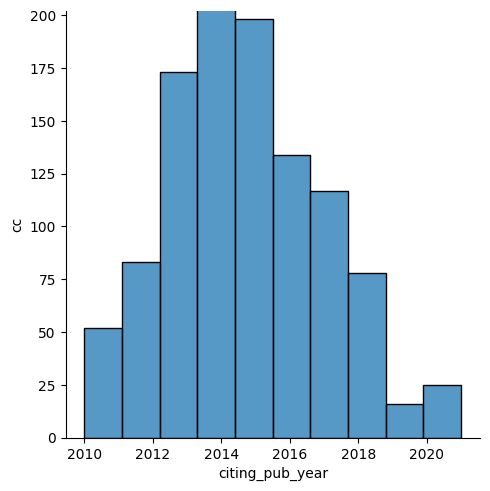

In [256]:
sn.displot(oc[oc['cited']=='10.1109/cvpr.2010.5540018']['citing_pub_year'],bins=10)
plt.ylabel('cc')
plt.ylim(0,202)

Text(0.5, 0, 'citation year')

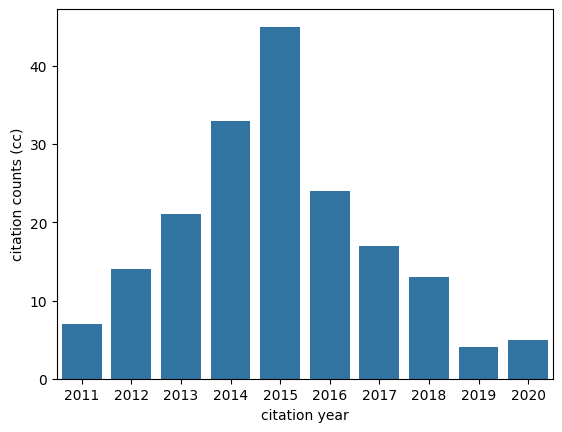

In [314]:
sn.barplot(data=top5cites_yr[top5cites_yr['cited']=='10.1109/socialcom.2010.33'],x='citing_pub_year',y='citing',color='tab:blue')
plt.ylabel('citation counts (cc)')
plt.xlabel('citation year')

(0.0, 40.0)

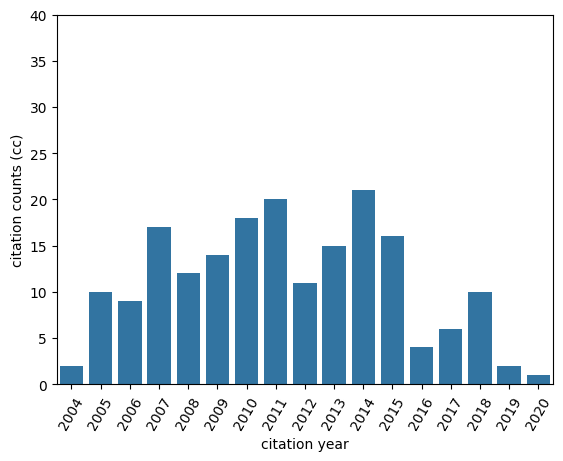

In [341]:
sn.barplot(data=top5cites_yr[top5cites_yr['cited']=='10.1109/tse.2004.9'],x='citing_pub_year',y='citing',color='tab:blue')
plt.ylabel('citation counts (cc)')
plt.xlabel('citation year')
plt.xticks(rotation=60)
plt.ylim(0,40)

(0.0, 40.0)

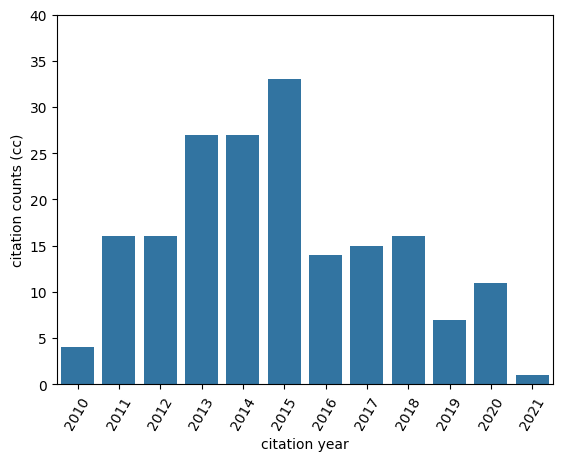

In [342]:
sn.barplot(data=top5cites_yr[top5cites_yr['cited']=='10.1109/mnet.2010.5430142'],x='citing_pub_year',y='citing',color='tab:blue')
plt.ylabel('citation counts (cc)')
plt.xlabel('citation year')
plt.xticks(rotation=60)
plt.ylim(0,40)

Text(0.5, 0, 'citation year')

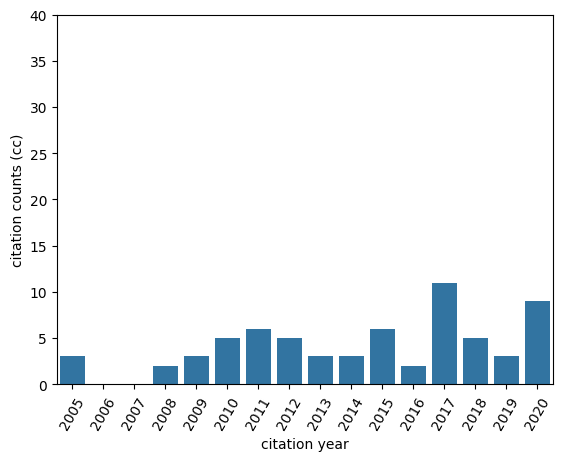

In [316]:
sn.barplot(data=p1,x='citing_pub_year',y='citing',color='tab:blue')
plt.xticks(rotation=60)
plt.ylim(0,40)
plt.ylabel('citation counts (cc)')
plt.xlabel('citation year')

In [272]:
top5cites_yr['citing_pub_year'] = top5cites_yr['citing_pub_year'].map(int)

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16240/2978015607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5cites_yr['citing_pub_year'] = top5cites_yr['citing_pub_year'].map(int)


In [273]:
top5cites_yr[top5cites_yr['cited']=='10.1109/lgrs.2005.845033'].sort_values(by='citing_pub_year')

,cited,citing_pub_year,citing,year,k
510108,10.1109/lgrs.2005.845033,2005,3,2005,0
510109,10.1109/lgrs.2005.845033,2008,2,2005,3
510110,10.1109/lgrs.2005.845033,2009,3,2005,4
510111,10.1109/lgrs.2005.845033,2010,5,2005,5
510112,10.1109/lgrs.2005.845033,2011,6,2005,6
510113,10.1109/lgrs.2005.845033,2012,5,2005,7
510114,10.1109/lgrs.2005.845033,2013,3,2005,8
510115,10.1109/lgrs.2005.845033,2014,3,2005,9
510116,10.1109/lgrs.2005.845033,2015,6,2005,10
510117,10.1109/lgrs.2005.845033,2016,2,2005,11


In [307]:
p1 = top5cites_yr[top5cites_yr['cited']=='10.1109/lgrs.2005.845033'].sort_values(by='citing_pub_year')

In [308]:
p1 = pd.concat([p1,pd.DataFrame({
    "cited":"10.1109/lgrs.2005.845033",
                                "citing_pub_year":2006,
                                "citing":0,
                                "year":2005,
                                "k":1},index=[0])],axis=0)
p1 = pd.concat([p1,pd.DataFrame({
    "cited":"10.1109/lgrs.2005.845033",
                                "citing_pub_year":2007,
                                "citing":0,
                                "year":2005,
                                "k":1},index=[0])],axis=0)


In [317]:
p1 = top5cites_yr[top5cites_yr['cited']=='10.1080/01969722.2010.511552'].sort_values(by='citing_pub_year')

In [318]:
p1

,cited,citing_pub_year,citing,year,k
318651,10.1080/01969722.2010.511552,2011,4,2010,1
318652,10.1080/01969722.2010.511552,2012,5,2010,2
318653,10.1080/01969722.2010.511552,2013,7,2010,3
318654,10.1080/01969722.2010.511552,2014,10,2010,4
318655,10.1080/01969722.2010.511552,2015,12,2010,5
318656,10.1080/01969722.2010.511552,2016,7,2010,6
318657,10.1080/01969722.2010.511552,2017,24,2010,7
318658,10.1080/01969722.2010.511552,2018,20,2010,8
318659,10.1080/01969722.2010.511552,2019,13,2010,9
318660,10.1080/01969722.2010.511552,2020,4,2010,10


(0.0, 40.0)

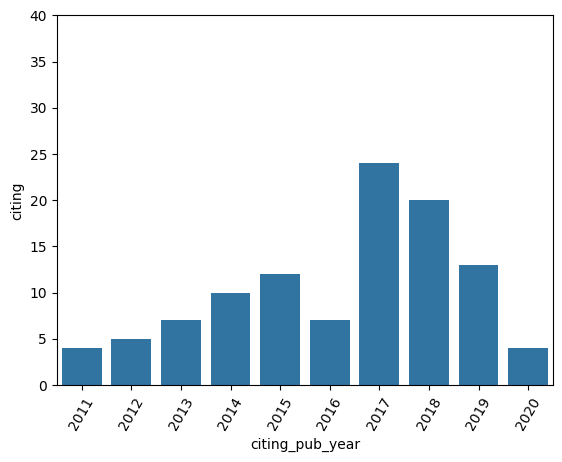

In [319]:
sn.barplot(data=p1,x='citing_pub_year',y='citing',color='tab:blue')
plt.xticks(rotation=60)
plt.ylim(0,40)

In [227]:
ds10_ds['diff_w2_w10'] =ds10_ds['w10_ds'] - ds10_ds['w2_ds']

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16240/1049217923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds10_ds['diff_w2_w10'] =ds10_ds['w10_ds'] - ds10_ds['w2_ds']


In [236]:
ds10_ds[(ds10_ds['w2_ds']>0.1) & (ds10_ds['w10_ds']<0)].sort_values(by=['cc'],ascending=False).head(20)[['title','doi','year','cc','w2_ds','w4_ds','w6_ds','w8_ds','w10_ds','all_ds','w2_percn','w10_percn','diff_w2_w10']]

,title,doi,year,cc,w2_ds,w4_ds,w6_ds,w8_ds,w10_ds,all_ds,w2_percn,w10_percn,diff_w2_w10
2494451,A Low Power Phase-Change Random Access Memory ...,10.1109/iscas.2007.377981,2007,77,0.250000,-0.272727,-0.633333,-0.781250,-0.831325,-0.842697,0.866238,0.001162,-1.081325
312188,Using the h-index to rank influential informat...,10.1002/asi.20354,2006,69,0.153846,0.061538,-0.043478,-0.071429,-0.074380,-0.098039,0.865649,0.057599,-0.228226
428271,An energy-efficient charge recycling approach ...,10.1109/iscas.2005.1464555,2005,66,0.166667,0.000000,-0.325581,-0.491803,-0.604938,-0.644444,0.865832,0.003498,-0.771605
2856333,Defect and error tolerance in the presence of ...,10.1109/mdt.2004.8,2004,57,0.300000,-0.130435,-0.307692,-0.382979,-0.491803,-0.522388,0.866313,0.005709,-0.791803
2343511,MZmine: toolbox for processing and visualizati...,10.1093/bioinformatics/btk039,2006,52,0.170732,0.059701,0.023256,-0.049020,-0.053571,-0.083333,0.865838,0.080088,-0.224303
443722,Diagonal stability of a class of cyclic system...,10.1016/j.automatica.2006.04.009,2006,51,0.133333,-0.117647,-0.267857,-0.301587,-0.304348,-0.272727,0.865373,0.011871,-0.437681
649191,Continuous monitoring of business process cont...,10.1016/j.accinf.2005.10.004,2006,46,0.111111,-0.187500,-0.131579,-0.122807,-0.107692,-0.128205,0.865140,0.039311,-0.218803
2373281,Zigbee-based intra-car wireless sensor network...,10.1109/mwc.2007.4407229,2007,31,0.400000,-0.300000,-0.294118,-0.379310,-0.406250,-0.472222,0.866519,0.007817,-0.806250
2894892,Audio Based Event Detection for Multimedia Sur...,10.1109/icassp.2006.1661400,2006,30,0.133333,0.080000,0.025000,0.014925,-0.013158,0.000000,0.865373,0.261016,-0.146491
1422212,Risk Analysis in Software Design,10.1109/msp.2004.55,2004,29,0.153846,0.040000,-0.046512,-0.109091,-0.149254,-0.154639,0.865649,0.027743,-0.303100


In [348]:
doids = ds10_ds.melt(id_vars=['doi','year','n_authors','cc'],value_vars=['w2_ds','w4_ds','w6_ds','w8_ds','w10_ds'],var_name = 'w',value_name='ds')

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16240/3592734405.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$D^{2}_i$',r'$D^4_i$',r'$D_i^6$',r'$D_i^8$',r'$D_i^{10}$'])


Text(0.5, 0, '')

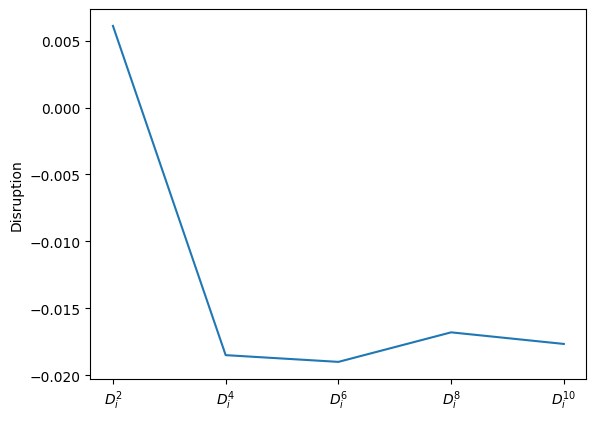

In [359]:
fig, ax = plt.subplots()
sn.lineplot(data=doids[doids['doi']=='10.1109/socialcom.2010.33'],x='w',y='ds')
ax.set_xticklabels([r'$D^{2}_i$',r'$D^4_i$',r'$D_i^6$',r'$D_i^8$',r'$D_i^{10}$'])
plt.ylabel('Disruption')
plt.xlabel('')

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16240/641148446.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$D^{2}_i$',r'$D^4_i$',r'$D_i^6$',r'$D_i^8$',r'$D_i^{10}$'])


Text(0.5, 0, '')

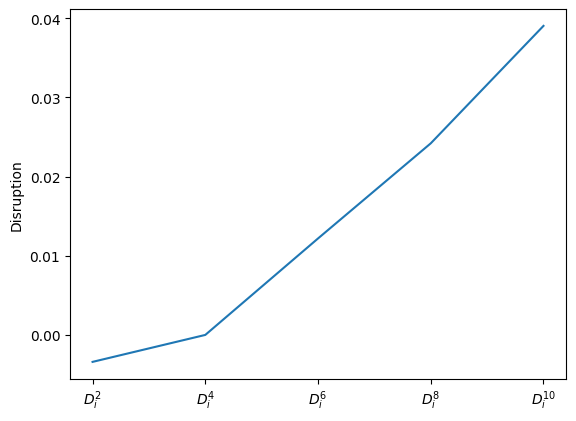

In [358]:
fig, ax = plt.subplots()
sn.lineplot(data=doids[doids['doi']=='10.1109/tse.2004.9'],x='w',y='ds')
ax.set_xticklabels([r'$D^{2}_i$',r'$D^4_i$',r'$D_i^6$',r'$D_i^8$',r'$D_i^{10}$'])
plt.ylabel('Disruption')
plt.xlabel('')

/var/folders/5l/2d23jjhs3zjdnkx4dld_ppyh0000gn/T/ipykernel_16240/787782490.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$D^{2}_i$',r'$D_i^4$',r'$D_i^6$',r'$D_i^8$',r'$D_i^{10}$'])


Text(0.5, 0, '')

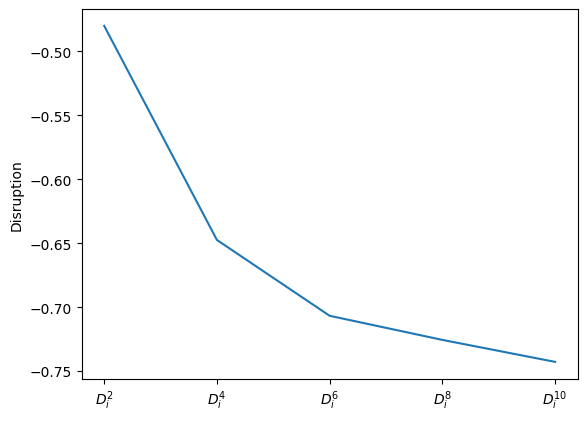

In [357]:
fig, ax = plt.subplots()
sn.lineplot(data=doids[doids['doi']=='10.1109/mnet.2010.5430142'],x='w',y='ds')
ax.set_xticklabels([r'$D^{2}_i$',r'$D_i^4$',r'$D_i^6$',r'$D_i^8$',r'$D_i^{10}$'])
plt.ylabel('Disruption')
plt.xlabel('')

In [347]:
ds10_ds[ds10_ds['doi']=='10.1109/socialcom.2010.33'][['title','doi','year','cc','w2_ds','w4_ds','w6_ds','w8_ds','w10_ds','all_ds','w2_percn','w10_percn','diff_w2_w10']]

,title,doi,year,cc,w2_ds,w4_ds,w6_ds,w8_ds,w10_ds,all_ds,w2_percn,w10_percn,diff_w2_w10
988628,Want to be Retweeted? Large Scale Analytics on...,10.1109/socialcom.2010.33,2010,183,0.00611,-0.018504,-0.019007,-0.016799,-0.017666,-0.017645,0.846663,0.21259,-0.023776


In [346]:
sum([sb(top5cites_yr,ctmdf,'10.1109/socialcom.2010.33', i) for i in range(10)])

28.69239583945466

In [330]:
sum([sb(top5cites_yr,ctmdf,'10.1109/mnet.2010.5430142', i) for i in range(10)])

12.310833333333331

In [338]:
sum([sb(top5cites_yr,ctmdf,'10.1109/tse.2004.9', i) for i in range(10)])

-1.5447716662422548

In [336]:
ds10_ds[(ds10_ds['w2_ds']<0) & (ds10_ds['w10_ds']>0)].sort_values(by=['cc','year'],ascending=False).head(20)[['title','doi','year','cc','w2_ds','w4_ds','w6_ds','w8_ds','w10_ds','all_ds','w2_percn','w10_percn','diff_w2_w10']]

,title,doi,year,cc,w2_ds,w4_ds,w6_ds,w8_ds,w10_ds,all_ds,w2_percn,w10_percn,diff_w2_w10
1730343,Wireless sensor networks: a survey,10.1016/s1389-1286(01)00302-4,2002,4305,-0.026203,-0.031146,-0.010542,0.014771,0.043358,0.107546,0.076082,0.659713,0.069561
405548,Shape Matching and Object Recognition Using Sh...,10.1109/34.993558,2002,2210,-0.005316,-0.003454,0.000294,0.005097,0.011543,0.017870,0.291651,0.654280,0.016859
742188,A flexible new technique for camera calibration,10.1109/34.888718,2000,1927,-0.002307,0.006381,-0.002123,0.020552,0.059392,0.264374,0.449123,0.660535,0.061698
2045453,Information flow and cooperative control of ve...,10.1109/tac.2004.834433,2004,1137,-0.002778,0.001176,0.027655,0.053163,0.079953,0.113616,0.414390,0.661243,0.082731
1770699,Learning to Detect Natural Image Boundaries Us...,10.1109/tpami.2004.1273918,2004,823,-0.003093,-0.003630,-0.001124,0.003383,0.002793,0.004430,0.393918,0.646777,0.005886
87434,Maximum lifetime routing in wireless sensor ne...,10.1109/tnet.2004.833122,2004,487,-0.002208,0.000660,0.001892,0.005019,0.006080,0.010108,0.457307,0.650907,0.008287
163440,Solution of the Multiuser Downlink Beamforming...,10.1109/tvt.2003.819629,2004,482,-0.018836,-0.008838,0.008430,0.032343,0.053464,0.079843,0.105490,0.660291,0.072299
1571991,Domain Adaptation via Transfer Component Analysis,10.1109/tnn.2010.2091281,2010,438,-0.003044,-0.003048,-0.003157,-0.002070,0.000636,0.000759,0.396881,0.640982,0.003680
2419577,User cooperation diversity-part II: implementa...,10.1109/tcomm.2003.819238,2003,367,-0.000365,0.000110,0.002555,0.004038,0.005427,0.008065,0.677190,0.650323,0.005792
2853071,Measuring ISP topologies with Rocketfuel,10.1109/tnet.2003.822655,2004,330,-0.005645,0.001745,0.007763,0.020568,0.033892,0.051093,0.280709,0.658907,0.039537


In [247]:
ds10_ds[(ds10_ds['w2_ds']>0.1) & (ds10_ds['w10_ds']<-0.1)].sort_values(by=['cc'],ascending=False).head(20)[['title','doi','year','cc','w2_ds','w4_ds','w6_ds','w8_ds','w10_ds','all_ds','w2_percn','w10_percn','diff_w2_w10']]

,title,doi,year,cc,w2_ds,w4_ds,w6_ds,w8_ds,w10_ds,all_ds,w2_percn,w10_percn,diff_w2_w10
2494451,A Low Power Phase-Change Random Access Memory ...,10.1109/iscas.2007.377981,2007,77,0.250000,-0.272727,-0.633333,-0.781250,-0.831325,-0.842697,0.866238,0.001162,-1.081325
428271,An energy-efficient charge recycling approach ...,10.1109/iscas.2005.1464555,2005,66,0.166667,0.000000,-0.325581,-0.491803,-0.604938,-0.644444,0.865832,0.003498,-0.771605
2856333,Defect and error tolerance in the presence of ...,10.1109/mdt.2004.8,2004,57,0.300000,-0.130435,-0.307692,-0.382979,-0.491803,-0.522388,0.866313,0.005709,-0.791803
443722,Diagonal stability of a class of cyclic system...,10.1016/j.automatica.2006.04.009,2006,51,0.133333,-0.117647,-0.267857,-0.301587,-0.304348,-0.272727,0.865373,0.011871,-0.437681
649191,Continuous monitoring of business process cont...,10.1016/j.accinf.2005.10.004,2006,46,0.111111,-0.187500,-0.131579,-0.122807,-0.107692,-0.128205,0.865140,0.039311,-0.218803
2373281,Zigbee-based intra-car wireless sensor network...,10.1109/mwc.2007.4407229,2007,31,0.400000,-0.300000,-0.294118,-0.379310,-0.406250,-0.472222,0.866519,0.007817,-0.806250
1422212,Risk Analysis in Software Design,10.1109/msp.2004.55,2004,29,0.153846,0.040000,-0.046512,-0.109091,-0.149254,-0.154639,0.865649,0.027743,-0.303100
87156,Usage-Centered Engineering for Web Applications,10.1109/52.991331,2002,28,0.200000,-0.095238,-0.178571,-0.216216,-0.268293,-0.360000,0.866032,0.013909,-0.468293
441120,Aggressive Maneuvering of Small Autonomous Hel...,10.1177/02783640122068100,2001,28,0.200000,-0.181818,-0.285714,-0.333333,-0.310345,-0.385965,0.866032,0.011552,-0.510345
1016376,Comparison of different genotype encodings for...,10.1162/106454601317297022,2002,27,0.142857,0.071429,-0.052632,-0.178571,-0.205882,-0.294118,0.865551,0.019299,-0.348739
